In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from datatools.SOWFA.constant.forcingTable import ForcingTable

## Reading a forcing table generated by WRF.viz

In [21]:
tab = ForcingTable()

In [22]:
tab.read_csv('forcingTable.csv')

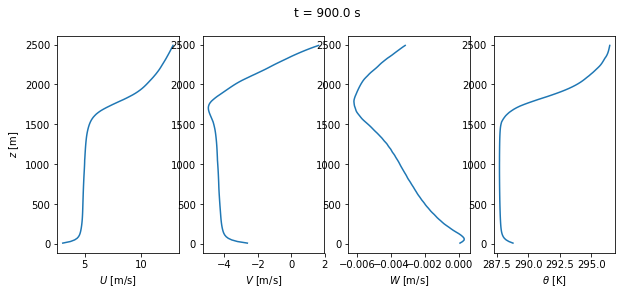

In [31]:
tab.plot(itime=1)

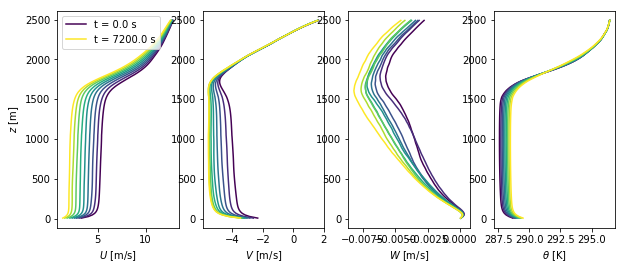

In [30]:
tab.plot_over_time()

## Read an existing forcingTable